In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
# cross validation:
lo = LeaveOneOut()

# TC BASE 

In [3]:
data = pd.read_csv('data_tc.csv')
data

,Unnamed: 0.1,Unnamed: 0,ID,Name,Class,label,Fe,Cr,Ni,Mo,...,hardness,VF FCC_A1#2,ND FCC_A1#2,MR FCC_A1#2,VF HCP_A3#2,ND HCP_A3#2,MR HCP_A3#2,VF M7C3_D101,ND M7C3_D101,MR M7C3_D101
0,3,3,63174908f9be0a8222a94066,22K,P,1,97.5150,0.400,0.30,0.000,...,NaN,1.016101e-03,24.415582,0.453338,2.667486e-38,-9.816621,0.346906,9.962542e-07,16.832385,15.180947
1,5,5,63174908f9be0a8222a941ce,12X1MF,P,1,96.9850,1.050,0.25,0.300,...,NaN,7.581019e-03,23.839904,1.377987,5.685520e-06,20.939401,1.159917,3.272388e-05,19.342042,7.083446
2,6,6,63174908f9be0a8222a94201,15X1M1F,P,1,96.0450,1.250,0.25,1.000,...,145.0,2.001312e-03,21.241105,6.496911,5.157331e-03,20.356528,17.563169,4.964047e-03,19.525604,32.813126
3,7,7,63174908f9be0a8222a94202,15X1M1F,P,1,96.0250,1.250,0.25,1.000,...,164.0,2.495324e-03,20.808990,9.742775,4.144414e-03,20.607533,13.467299,7.623446e-03,19.766833,31.458874
4,8,8,63174908f9be0a8222a94203,15X1M1F,P,1,96.0050,1.250,0.25,1.000,...,180.0,2.563256e-03,21.018421,8.370679,2.824319e-03,21.498466,5.981172,1.117378e-02,19.949696,31.055496
5,9,9,63174908f9be0a8222a94204,15X1M1F,P,1,96.0350,1.250,0.25,1.000,...,NaN,2.160150e-03,20.833563,9.111938,4.597314e-03,20.623546,13.770712,6.472328e-03,19.651223,32.552389
6,12,12,63174908f9be0a8222a942a1,15XMFKR,P,1,94.9420,1.300,0.00,1.050,...,NaN,2.500521e-03,21.702480,4.910818,6.066724e-03,21.008688,11.238958,9.906192e-03,20.169174,25.208551
7,14,14,63174c88f9be0a8222a9532a,15XM,P,2,97.2750,0.950,0.15,0.475,...,NaN,9.186205e-03,21.220901,10.966017,1.100362e-06,18.030522,6.256165,1.152426e-05,17.786575,16.506298
8,17,17,63174c88f9be0a8222a953a4,12X1MF,P,2,97.2150,1.050,0.15,0.300,...,NaN,5.258004e-03,22.116935,4.577193,3.958432e-24,3.699350,0.573713,4.483755e-03,19.228551,39.841369
9,18,18,63174c88f9be0a8222a953b9,15X1M1F,P,2,96.3250,1.250,0.15,1.000,...,NaN,1.017841e-03,20.841808,7.045762,5.279714e-03,20.216331,19.711983,8.937280e-03,19.561182,38.842894


In [7]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Name', 'Class', 'label', 'Fe',
       'Cr', 'Ni', 'Mo', 'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N',
       'S', 'Co', 'Cu', 'W', 'As', 'HT stage 1 name', 'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 name',
       'HT stage 2 temperature', 'HT stage 2 duration', 'HT stage 2 cooling',
       'HT stage 3 name', 'HT stage 3 temperature', 'HT stage 3 duration',
       'HT stage 3 cooling', 'AH stage 1 temperature', 'AH stage 1 duration',
       'AH stage 2 temperature', 'AH stage 2 duration',
       'AH stage 3 temperature', 'AH stage 3 duration',
       'AH stage 4 temperature', 'AH stage 4 duration', 'Aging temperature',
       'Aging duration', 'Sort', 'Temperature', 'yeld strength',
       'ultimate tensile strength', 'maximum elongation',
       'maximum contruction', 'toughness', 'creep limit stress',
       'equivalent creep speed', 'long-therm strength',
       'long-therm strength ti

In [4]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling']

In [5]:
X = data[columns]
y = data['yeld strength']
X = np.array(X)
y = np.array(y)

# Lasso predict

In [7]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e1, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 100 candidates, totalling 3900 fits
[CV 1/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/39; 1/100] END ...lasso__alpha=1e-05;, score=-78768.715 total time=   0.0s
[CV 2/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/39; 1/100] END ....lasso__alpha=1e-05;, score=-4088.196 total time=   0.0s
[CV 3/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/39; 1/100] END ....lasso__alpha=1e-05;, score=-4377.742 total time=   0.0s
[CV 4/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/39; 1/100] END ....lasso__alpha=1e-05;, score=-1899.714 total time=   0.0s
[CV 5/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/39; 1/100] END .......lasso__alpha=1e-05;, score=-9.374 total time=   0.0s
[CV 6/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/39; 1/100] END ...lasso__alpha=1e-05;,

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.784e+04, tolerance: 1.107e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.887e+04, tolerance: 1.144e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.646e+04, tolerance: 1.152e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.868e+04, tolerance: 1.111e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 23/39; 1/100] END ...lasso__alpha=1e-05;, score=-7879.214 total time=   0.0s
[CV 24/39; 1/100] START lasso__alpha=1e-05......................................
[CV 24/39; 1/100] END ..lasso__alpha=1e-05;, score=-15496.747 total time=   0.0s
[CV 25/39; 1/100] START lasso__alpha=1e-05......................................
[CV 25/39; 1/100] END ..lasso__alpha=1e-05;, score=-16309.862 total time=   0.0s
[CV 26/39; 1/100] START lasso__alpha=1e-05......................................
[CV 26/39; 1/100] END ..lasso__alpha=1e-05;, score=-46876.289 total time=   0.0s
[CV 27/39; 1/100] START lasso__alpha=1e-05......................................
[CV 27/39; 1/100] END ...lasso__alpha=1e-05;, score=-6954.983 total time=   0.0s
[CV 28/39; 1/100] START lasso__alpha=1e-05......................................
[CV 28/39; 1/100] END ..lasso__alpha=1e-05;, score=-66418.007 total time=   0.0s
[CV 29/39; 1/100] START lasso__alpha=1e-05......................................
[CV 29/39; 1/100] END ..lass

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.292e+02, tolerance: 1.162e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+03, tolerance: 1.162e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 6/39; 2/100] END .lasso__alpha=0.10102;, score=-19456.116 total time=   0.0s
[CV 7/39; 2/100] START lasso__alpha=0.10102.....................................
[CV 7/39; 2/100] END lasso__alpha=0.10102;, score=-754652887.101 total time=   0.0s
[CV 8/39; 2/100] START lasso__alpha=0.10102.....................................
[CV 8/39; 2/100] END ..lasso__alpha=0.10102;, score=-3213.689 total time=   0.0s
[CV 9/39; 2/100] START lasso__alpha=0.10102.....................................
[CV 9/39; 2/100] END .lasso__alpha=0.10102;, score=-74830.759 total time=   0.0s
[CV 10/39; 2/100] START lasso__alpha=0.10102....................................
[CV 10/39; 2/100] END .lasso__alpha=0.10102;, score=-4343.736 total time=   0.0s
[CV 11/39; 2/100] START lasso__alpha=0.10102....................................
[CV 11/39; 2/100] END .lasso__alpha=0.10102;, score=-8303.674 total time=   0.0s
[CV 12/39; 2/100] START lasso__alpha=0.10102....................................
[CV 12/39; 2/100] END ..l

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+03, tolerance: 1.141e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+02, tolerance: 1.120e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 27/39; 2/100] END .lasso__alpha=0.10102;, score=-8391.844 total time=   0.0s
[CV 28/39; 2/100] START lasso__alpha=0.10102....................................
[CV 28/39; 2/100] END lasso__alpha=0.10102;, score=-73654.851 total time=   0.0s
[CV 29/39; 2/100] START lasso__alpha=0.10102....................................
[CV 29/39; 2/100] END lasso__alpha=0.10102;, score=-13045.410 total time=   0.0s
[CV 30/39; 2/100] START lasso__alpha=0.10102....................................
[CV 30/39; 2/100] END lasso__alpha=0.10102;, score=-10138.804 total time=   0.0s
[CV 31/39; 2/100] START lasso__alpha=0.10102....................................
[CV 31/39; 2/100] END .lasso__alpha=0.10102;, score=-8660.914 total time=   0.0s
[CV 32/39; 2/100] START lasso__alpha=0.10102....................................
[CV 32/39; 2/100] END ..lasso__alpha=0.10102;, score=-903.010 total time=   0.0s
[CV 33/39; 2/100] START lasso__alpha=0.10102....................................
[CV 33/39; 2/100] END .lasso

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.273e+02, tolerance: 1.140e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+03, tolerance: 1.141e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 10/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-4228.606 total time=   0.0s
[CV 11/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 11/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-7419.011 total time=   0.0s
[CV 12/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 12/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-454.044 total time=   0.0s
[CV 13/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 13/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-6127.682 total time=   0.0s
[CV 14/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 14/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-5273.545 total time=   0.0s
[CV 15/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 15/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-65144.161 total time=   0.0s
[CV 16/39; 3/100] START lasso__alpha=0.2020

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+02, tolerance: 1.138e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+02, tolerance: 1.158e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 32/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-1074.623 total time=   0.0s
[CV 33/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 33/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-10855.896 total time=   0.0s
[CV 34/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 34/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-6054.793 total time=   0.0s
[CV 35/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 35/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-7060.347 total time=   0.0s
[CV 36/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 36/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-3018.593 total time=   0.0s
[CV 37/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 37/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-508.343 total time=   0.0s
[CV 38/39; 3/100] START lasso__alpha=0.2020

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+02, tolerance: 1.059e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+02, tolerance: 1.151e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 3/39; 5/100] END ..lasso__alpha=0.40405;, score=-4542.152 total time=   0.0s
[CV 4/39; 5/100] START lasso__alpha=0.40405.....................................
[CV 4/39; 5/100] END ..lasso__alpha=0.40405;, score=-1939.377 total time=   0.0s
[CV 5/39; 5/100] START lasso__alpha=0.40405.....................................
[CV 5/39; 5/100] END .....lasso__alpha=0.40405;, score=-9.251 total time=   0.0s
[CV 6/39; 5/100] START lasso__alpha=0.40405.....................................
[CV 6/39; 5/100] END .lasso__alpha=0.40405;, score=-17246.744 total time=   0.0s
[CV 7/39; 5/100] START lasso__alpha=0.40405.....................................
[CV 7/39; 5/100] END .lasso__alpha=0.40405;, score=-39513.878 total time=   0.0s
[CV 8/39; 5/100] START lasso__alpha=0.40405.....................................
[CV 8/39; 5/100] END ..lasso__alpha=0.40405;, score=-2643.817 total time=   0.0s
[CV 9/39; 5/100] START lasso__alpha=0.40405.....................................
[CV 9/39; 5/100] END .lasso_

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+02, tolerance: 1.162e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.146e+02, tolerance: 1.144e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 28/39; 5/100] END lasso__alpha=0.40405;, score=-67696.779 total time=   0.0s
[CV 29/39; 5/100] START lasso__alpha=0.40405....................................
[CV 29/39; 5/100] END lasso__alpha=0.40405;, score=-14040.033 total time=   0.0s
[CV 30/39; 5/100] START lasso__alpha=0.40405....................................
[CV 30/39; 5/100] END lasso__alpha=0.40405;, score=-11612.096 total time=   0.0s
[CV 31/39; 5/100] START lasso__alpha=0.40405....................................
[CV 31/39; 5/100] END .lasso__alpha=0.40405;, score=-6228.307 total time=   0.0s
[CV 32/39; 5/100] START lasso__alpha=0.40405....................................
[CV 32/39; 5/100] END .lasso__alpha=0.40405;, score=-1339.602 total time=   0.0s
[CV 33/39; 5/100] START lasso__alpha=0.40405....................................
[CV 33/39; 5/100] END lasso__alpha=0.40405;, score=-13649.531 total time=   0.0s
[CV 34/39; 5/100] START lasso__alpha=0.40405....................................
[CV 34/39; 5/100] END .lasso

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.669e+02, tolerance: 1.144e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+02, tolerance: 1.141e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 12/39; 6/100] END ..lasso__alpha=0.50506;, score=-112.289 total time=   0.0s
[CV 13/39; 6/100] START lasso__alpha=0.50506....................................
[CV 13/39; 6/100] END .lasso__alpha=0.50506;, score=-5047.989 total time=   0.0s
[CV 14/39; 6/100] START lasso__alpha=0.50506....................................
[CV 14/39; 6/100] END .lasso__alpha=0.50506;, score=-2072.511 total time=   0.0s
[CV 15/39; 6/100] START lasso__alpha=0.50506....................................
[CV 15/39; 6/100] END lasso__alpha=0.50506;, score=-20350.132 total time=   0.0s
[CV 16/39; 6/100] START lasso__alpha=0.50506....................................
[CV 16/39; 6/100] END lasso__alpha=0.50506;, score=-898483.146 total time=   0.0s
[CV 17/39; 6/100] START lasso__alpha=0.50506....................................
[CV 17/39; 6/100] END .lasso__alpha=0.50506;, score=-3553.294 total time=   0.0s
[CV 18/39; 6/100] START lasso__alpha=0.50506....................................
[CV 18/39; 6/100] END .lass

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.299e+02, tolerance: 1.144e+02
  model = cd_fast.enet_coordinate_descent(


[CV 23/39; 7/100] END .lasso__alpha=0.60607;, score=-7202.048 total time=   0.0s
[CV 24/39; 7/100] START lasso__alpha=0.60607....................................
[CV 24/39; 7/100] END lasso__alpha=0.60607;, score=-173946.064 total time=   0.0s
[CV 25/39; 7/100] START lasso__alpha=0.60607....................................
[CV 25/39; 7/100] END lasso__alpha=0.60607;, score=-192873.267 total time=   0.0s
[CV 26/39; 7/100] START lasso__alpha=0.60607....................................
[CV 26/39; 7/100] END .lasso__alpha=0.60607;, score=-5657.249 total time=   0.0s
[CV 27/39; 7/100] START lasso__alpha=0.60607....................................
[CV 27/39; 7/100] END .lasso__alpha=0.60607;, score=-9302.516 total time=   0.0s
[CV 28/39; 7/100] START lasso__alpha=0.60607....................................
[CV 28/39; 7/100] END lasso__alpha=0.60607;, score=-61910.453 total time=   0.0s
[CV 29/39; 7/100] START lasso__alpha=0.60607....................................
[CV 29/39; 7/100] END lass

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+02, tolerance: 1.105e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+02, tolerance: 1.144e+02
  model = cd_fast.enet_coordinate_descent(


[CV 11/39; 8/100] END lasso__alpha=0.7070799999999999;, score=-5975.807 total time=   0.0s
[CV 12/39; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 12/39; 8/100] END lasso__alpha=0.7070799999999999;, score=-192.456 total time=   0.0s
[CV 13/39; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 13/39; 8/100] END lasso__alpha=0.7070799999999999;, score=-5154.035 total time=   0.0s
[CV 14/39; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 14/39; 8/100] END lasso__alpha=0.7070799999999999;, score=-1265.298 total time=   0.0s
[CV 15/39; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 15/39; 8/100] END lasso__alpha=0.7070799999999999;, score=-31972.546 total time=   0.0s
[CV 16/39; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 16/39; 8/100] END lasso__alpha=0.7070799999999999;, score=-924783.473 total time=   0.0s
[CV 17/39; 8/100] START lasso__alpha=0.70707999

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.082e+02, tolerance: 1.069e+02
  model = cd_fast.enet_coordinate_descent(


[CV 30/39; 9/100] END lasso__alpha=0.80809;, score=-13143.944 total time=   0.0s
[CV 31/39; 9/100] START lasso__alpha=0.80809....................................
[CV 31/39; 9/100] END .lasso__alpha=0.80809;, score=-5324.600 total time=   0.0s
[CV 32/39; 9/100] START lasso__alpha=0.80809....................................
[CV 32/39; 9/100] END .lasso__alpha=0.80809;, score=-2805.499 total time=   0.0s
[CV 33/39; 9/100] START lasso__alpha=0.80809....................................
[CV 33/39; 9/100] END lasso__alpha=0.80809;, score=-15955.842 total time=   0.0s
[CV 34/39; 9/100] START lasso__alpha=0.80809....................................
[CV 34/39; 9/100] END .lasso__alpha=0.80809;, score=-3951.900 total time=   0.0s
[CV 35/39; 9/100] START lasso__alpha=0.80809....................................
[CV 35/39; 9/100] END lasso__alpha=0.80809;, score=-10133.446 total time=   0.0s
[CV 36/39; 9/100] START lasso__alpha=0.80809....................................
[CV 36/39; 9/100] END .lasso

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+02, tolerance: 1.069e+02
  model = cd_fast.enet_coordinate_descent(


[CV 18/39; 10/100] END .lasso__alpha=0.9091;, score=-7456.346 total time=   0.0s
[CV 19/39; 10/100] START lasso__alpha=0.9091....................................
[CV 19/39; 10/100] END .lasso__alpha=0.9091;, score=-4228.247 total time=   0.0s
[CV 20/39; 10/100] START lasso__alpha=0.9091....................................
[CV 20/39; 10/100] END .lasso__alpha=0.9091;, score=-1595.127 total time=   0.0s
[CV 21/39; 10/100] START lasso__alpha=0.9091....................................
[CV 21/39; 10/100] END .lasso__alpha=0.9091;, score=-7099.400 total time=   0.0s
[CV 22/39; 10/100] START lasso__alpha=0.9091....................................
[CV 22/39; 10/100] END .lasso__alpha=0.9091;, score=-5709.971 total time=   0.0s
[CV 23/39; 10/100] START lasso__alpha=0.9091....................................
[CV 23/39; 10/100] END .lasso__alpha=0.9091;, score=-7496.213 total time=   0.0s
[CV 24/39; 10/100] START lasso__alpha=0.9091....................................
[CV 24/39; 10/100] END lasso

[CV 37/39; 11/100] END .lasso__alpha=1.01011;, score=-387.046 total time=   0.0s
[CV 38/39; 11/100] START lasso__alpha=1.01011...................................
[CV 38/39; 11/100] END lasso__alpha=1.01011;, score=-6894.483 total time=   0.0s
[CV 39/39; 11/100] START lasso__alpha=1.01011...................................
[CV 39/39; 11/100] END .lasso__alpha=1.01011;, score=-106.133 total time=   0.0s
[CV 1/39; 12/100] START lasso__alpha=1.11112....................................
[CV 1/39; 12/100] END .lasso__alpha=1.11112;, score=-3361.202 total time=   0.0s
[CV 2/39; 12/100] START lasso__alpha=1.11112....................................
[CV 2/39; 12/100] END ...lasso__alpha=1.11112;, score=-70.446 total time=   0.0s
[CV 3/39; 12/100] START lasso__alpha=1.11112....................................
[CV 3/39; 12/100] END .lasso__alpha=1.11112;, score=-3589.023 total time=   0.0s
[CV 4/39; 12/100] START lasso__alpha=1.11112....................................
[CV 4/39; 12/100] END .lasso

[CV 17/39; 13/100] END lasso__alpha=1.2121300000000002;, score=-4580.195 total time=   0.0s
[CV 18/39; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 18/39; 13/100] END lasso__alpha=1.2121300000000002;, score=-5104.112 total time=   0.0s
[CV 19/39; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 19/39; 13/100] END lasso__alpha=1.2121300000000002;, score=-3463.383 total time=   0.0s
[CV 20/39; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 20/39; 13/100] END lasso__alpha=1.2121300000000002;, score=-1729.250 total time=   0.0s
[CV 21/39; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 21/39; 13/100] END lasso__alpha=1.2121300000000002;, score=-6582.180 total time=   0.0s
[CV 22/39; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 22/39; 13/100] END lasso__alpha=1.2121300000000002;, score=-5222.196 total time=   0.0s
[CV 23/39; 13/100] START lasso__alpha=1.212

[CV 35/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-12734.906 total time=   0.0s
[CV 36/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 36/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-3745.949 total time=   0.0s
[CV 37/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 37/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-250.457 total time=   0.0s
[CV 38/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 38/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-6406.647 total time=   0.0s
[CV 39/39; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 39/39; 14/100] END lasso__alpha=1.3131400000000002;, score=-357.620 total time=   0.0s
[CV 1/39; 15/100] START lasso__alpha=1.41415....................................
[CV 1/39; 15/100] END lasso__alpha=1.41415;, score=-10541.122 total time=   0.0s
[CV 2/39; 15/100] START lasso__alpha=1.41415...........

[CV 16/39; 16/100] END lasso__alpha=1.51516;, score=-594566.442 total time=   0.0s
[CV 17/39; 16/100] START lasso__alpha=1.51516...................................
[CV 17/39; 16/100] END lasso__alpha=1.51516;, score=-4744.647 total time=   0.0s
[CV 18/39; 16/100] START lasso__alpha=1.51516...................................
[CV 18/39; 16/100] END lasso__alpha=1.51516;, score=-4418.373 total time=   0.0s
[CV 19/39; 16/100] START lasso__alpha=1.51516...................................
[CV 19/39; 16/100] END lasso__alpha=1.51516;, score=-2786.219 total time=   0.0s
[CV 20/39; 16/100] START lasso__alpha=1.51516...................................
[CV 20/39; 16/100] END lasso__alpha=1.51516;, score=-1896.832 total time=   0.0s
[CV 21/39; 16/100] START lasso__alpha=1.51516...................................
[CV 21/39; 16/100] END lasso__alpha=1.51516;, score=-5614.371 total time=   0.0s
[CV 22/39; 16/100] START lasso__alpha=1.51516...................................
[CV 22/39; 16/100] END las

[CV 1/39; 18/100] END lasso__alpha=1.7171800000000002;, score=-21707.049 total time=   0.0s
[CV 2/39; 18/100] START lasso__alpha=1.7171800000000002.........................
[CV 2/39; 18/100] END lasso__alpha=1.7171800000000002;, score=-265.897 total time=   0.0s
[CV 3/39; 18/100] START lasso__alpha=1.7171800000000002.........................
[CV 3/39; 18/100] END lasso__alpha=1.7171800000000002;, score=-2898.413 total time=   0.0s
[CV 4/39; 18/100] START lasso__alpha=1.7171800000000002.........................
[CV 4/39; 18/100] END lasso__alpha=1.7171800000000002;, score=-1027.614 total time=   0.0s
[CV 5/39; 18/100] START lasso__alpha=1.7171800000000002.........................
[CV 5/39; 18/100] END lasso__alpha=1.7171800000000002;, score=-186.656 total time=   0.0s
[CV 6/39; 18/100] START lasso__alpha=1.7171800000000002.........................
[CV 6/39; 18/100] END lasso__alpha=1.7171800000000002;, score=-20107.760 total time=   0.0s
[CV 7/39; 18/100] START lasso__alpha=1.7171800000

[CV 27/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-11657.632 total time=   0.0s
[CV 28/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 28/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-87114.865 total time=   0.0s
[CV 29/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 29/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-14848.299 total time=   0.0s
[CV 30/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 30/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-15320.039 total time=   0.0s
[CV 31/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 31/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-3370.209 total time=   0.0s
[CV 32/39; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 32/39; 19/100] END lasso__alpha=1.8181900000000002;, score=-6632.707 total time=   0.0s
[CV 33/39; 19/100] START lasso__alpha=1

[CV 15/39; 21/100] END lasso__alpha=2.02021;, score=-67193.551 total time=   0.0s
[CV 16/39; 21/100] START lasso__alpha=2.02021...................................
[CV 16/39; 21/100] END lasso__alpha=2.02021;, score=-424670.435 total time=   0.0s
[CV 17/39; 21/100] START lasso__alpha=2.02021...................................
[CV 17/39; 21/100] END lasso__alpha=2.02021;, score=-5071.773 total time=   0.0s
[CV 18/39; 21/100] START lasso__alpha=2.02021...................................
[CV 18/39; 21/100] END lasso__alpha=2.02021;, score=-7993.756 total time=   0.0s
[CV 19/39; 21/100] START lasso__alpha=2.02021...................................
[CV 19/39; 21/100] END lasso__alpha=2.02021;, score=-1783.319 total time=   0.0s
[CV 20/39; 21/100] START lasso__alpha=2.02021...................................
[CV 20/39; 21/100] END lasso__alpha=2.02021;, score=-2191.262 total time=   0.0s
[CV 21/39; 21/100] START lasso__alpha=2.02021...................................
[CV 21/39; 21/100] END la

[CV 3/39; 23/100] END .lasso__alpha=2.22223;, score=-2395.869 total time=   0.0s
[CV 4/39; 23/100] START lasso__alpha=2.22223....................................
[CV 4/39; 23/100] END ..lasso__alpha=2.22223;, score=-772.895 total time=   0.0s
[CV 5/39; 23/100] START lasso__alpha=2.22223....................................
[CV 5/39; 23/100] END ..lasso__alpha=2.22223;, score=-294.872 total time=   0.0s
[CV 6/39; 23/100] START lasso__alpha=2.22223....................................
[CV 6/39; 23/100] END lasso__alpha=2.22223;, score=-19691.595 total time=   0.0s
[CV 7/39; 23/100] START lasso__alpha=2.22223....................................
[CV 7/39; 23/100] END lasso__alpha=2.22223;, score=-42052161.187 total time=   0.0s
[CV 8/39; 23/100] START lasso__alpha=2.22223....................................
[CV 8/39; 23/100] END ..lasso__alpha=2.22223;, score=-274.145 total time=   0.0s
[CV 9/39; 23/100] START lasso__alpha=2.22223....................................
[CV 9/39; 23/100] END .la

[CV 31/39; 24/100] END lasso__alpha=2.32324;, score=-2689.918 total time=   0.0s
[CV 32/39; 24/100] START lasso__alpha=2.32324...................................
[CV 32/39; 24/100] END lasso__alpha=2.32324;, score=-8087.549 total time=   0.0s
[CV 33/39; 24/100] START lasso__alpha=2.32324...................................
[CV 33/39; 24/100] END lasso__alpha=2.32324;, score=-26718.502 total time=   0.0s
[CV 34/39; 24/100] START lasso__alpha=2.32324...................................
[CV 34/39; 24/100] END lasso__alpha=2.32324;, score=-1981.740 total time=   0.0s
[CV 35/39; 24/100] START lasso__alpha=2.32324...................................
[CV 35/39; 24/100] END lasso__alpha=2.32324;, score=-17072.446 total time=   0.0s
[CV 36/39; 24/100] START lasso__alpha=2.32324...................................
[CV 36/39; 24/100] END lasso__alpha=2.32324;, score=-2605.810 total time=   0.0s
[CV 37/39; 24/100] START lasso__alpha=2.32324...................................
[CV 37/39; 24/100] END ..l

[CV 29/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-14587.271 total time=   0.0s
[CV 30/39; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 30/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-14548.714 total time=   0.0s
[CV 31/39; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 31/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-2650.805 total time=   0.0s
[CV 32/39; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 32/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-8270.320 total time=   0.0s
[CV 33/39; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 33/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-27304.286 total time=   0.0s
[CV 34/39; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 34/39; 26/100] END lasso__alpha=2.5252600000000003;, score=-1575.128 total time=   0.0s
[CV 35/39; 26/100] START lasso__alpha=2.

[CV 24/39; 28/100] END lasso__alpha=2.72728;, score=-149724.209 total time=   0.0s
[CV 25/39; 28/100] START lasso__alpha=2.72728...................................
[CV 25/39; 28/100] END lasso__alpha=2.72728;, score=-207686.464 total time=   0.0s
[CV 26/39; 28/100] START lasso__alpha=2.72728...................................
[CV 26/39; 28/100] END .lasso__alpha=2.72728;, score=-153.397 total time=   0.0s
[CV 27/39; 28/100] START lasso__alpha=2.72728...................................
[CV 27/39; 28/100] END lasso__alpha=2.72728;, score=-10625.997 total time=   0.0s
[CV 28/39; 28/100] START lasso__alpha=2.72728...................................
[CV 28/39; 28/100] END lasso__alpha=2.72728;, score=-87592.378 total time=   0.0s
[CV 29/39; 28/100] START lasso__alpha=2.72728...................................
[CV 29/39; 28/100] END lasso__alpha=2.72728;, score=-14491.604 total time=   0.0s
[CV 30/39; 28/100] START lasso__alpha=2.72728...................................
[CV 30/39; 28/100] EN

[CV 16/39; 30/100] END lasso__alpha=2.9293;, score=-303239.976 total time=   0.0s
[CV 17/39; 30/100] START lasso__alpha=2.9293....................................
[CV 17/39; 30/100] END .lasso__alpha=2.9293;, score=-5495.895 total time=   0.0s
[CV 18/39; 30/100] START lasso__alpha=2.9293....................................
[CV 18/39; 30/100] END lasso__alpha=2.9293;, score=-13271.375 total time=   0.0s
[CV 19/39; 30/100] START lasso__alpha=2.9293....................................
[CV 19/39; 30/100] END ..lasso__alpha=2.9293;, score=-856.878 total time=   0.0s
[CV 20/39; 30/100] START lasso__alpha=2.9293....................................
[CV 20/39; 30/100] END .lasso__alpha=2.9293;, score=-2187.146 total time=   0.0s
[CV 21/39; 30/100] START lasso__alpha=2.9293....................................
[CV 21/39; 30/100] END .lasso__alpha=2.9293;, score=-2494.215 total time=   0.0s
[CV 22/39; 30/100] START lasso__alpha=2.9293....................................
[CV 22/39; 30/100] END .las

[CV 20/39; 32/100] END lasso__alpha=3.13132;, score=-2192.826 total time=   0.0s
[CV 21/39; 32/100] START lasso__alpha=3.13132...................................
[CV 21/39; 32/100] END lasso__alpha=3.13132;, score=-2514.351 total time=   0.0s
[CV 22/39; 32/100] START lasso__alpha=3.13132...................................
[CV 22/39; 32/100] END lasso__alpha=3.13132;, score=-2056.724 total time=   0.0s
[CV 23/39; 32/100] START lasso__alpha=3.13132...................................
[CV 23/39; 32/100] END lasso__alpha=3.13132;, score=-10071.989 total time=   0.0s
[CV 24/39; 32/100] START lasso__alpha=3.13132...................................
[CV 24/39; 32/100] END lasso__alpha=3.13132;, score=-140704.980 total time=   0.0s
[CV 25/39; 32/100] START lasso__alpha=3.13132...................................
[CV 25/39; 32/100] END lasso__alpha=3.13132;, score=-205196.081 total time=   0.0s
[CV 26/39; 32/100] START lasso__alpha=3.13132...................................
[CV 26/39; 32/100] END 

[CV 13/39; 34/100] END lasso__alpha=3.33334;, score=-4195.830 total time=   0.0s
[CV 14/39; 34/100] START lasso__alpha=3.33334...................................
[CV 14/39; 34/100] END .lasso__alpha=3.33334;, score=-378.593 total time=   0.0s
[CV 15/39; 34/100] START lasso__alpha=3.33334...................................
[CV 15/39; 34/100] END lasso__alpha=3.33334;, score=-59362.891 total time=   0.0s
[CV 16/39; 34/100] START lasso__alpha=3.33334...................................
[CV 16/39; 34/100] END lasso__alpha=3.33334;, score=-260901.300 total time=   0.0s
[CV 17/39; 34/100] START lasso__alpha=3.33334...................................
[CV 17/39; 34/100] END lasso__alpha=3.33334;, score=-6651.380 total time=   0.0s
[CV 18/39; 34/100] START lasso__alpha=3.33334...................................
[CV 18/39; 34/100] END lasso__alpha=3.33334;, score=-15570.488 total time=   0.0s
[CV 19/39; 34/100] START lasso__alpha=3.33334...................................
[CV 19/39; 34/100] END .

[CV 8/39; 36/100] END lasso__alpha=3.5353600000000003;, score=-73.165 total time=   0.0s
[CV 9/39; 36/100] START lasso__alpha=3.5353600000000003.........................
[CV 9/39; 36/100] END lasso__alpha=3.5353600000000003;, score=-393.681 total time=   0.0s
[CV 10/39; 36/100] START lasso__alpha=3.5353600000000003........................
[CV 10/39; 36/100] END lasso__alpha=3.5353600000000003;, score=-9513.984 total time=   0.0s
[CV 11/39; 36/100] START lasso__alpha=3.5353600000000003........................
[CV 11/39; 36/100] END lasso__alpha=3.5353600000000003;, score=-7885.333 total time=   0.0s
[CV 12/39; 36/100] START lasso__alpha=3.5353600000000003........................
[CV 12/39; 36/100] END lasso__alpha=3.5353600000000003;, score=-818.528 total time=   0.0s
[CV 13/39; 36/100] START lasso__alpha=3.5353600000000003........................
[CV 13/39; 36/100] END lasso__alpha=3.5353600000000003;, score=-4394.099 total time=   0.0s
[CV 14/39; 36/100] START lasso__alpha=3.535360000

[CV 7/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-105575891.465 total time=   0.0s
[CV 8/39; 38/100] START lasso__alpha=3.7373800000000004.........................
[CV 8/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-73.926 total time=   0.0s
[CV 9/39; 38/100] START lasso__alpha=3.7373800000000004.........................
[CV 9/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-356.104 total time=   0.0s
[CV 10/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 10/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-9558.699 total time=   0.0s
[CV 11/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 11/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-7734.223 total time=   0.0s
[CV 12/39; 38/100] START lasso__alpha=3.7373800000000004........................
[CV 12/39; 38/100] END lasso__alpha=3.7373800000000004;, score=-791.170 total time=   0.0s
[CV 13/39; 38/100] START lasso__alpha=3.73738

[CV 30/39; 39/100] END lasso__alpha=3.83839;, score=-12282.931 total time=   0.0s
[CV 31/39; 39/100] START lasso__alpha=3.83839...................................
[CV 31/39; 39/100] END lasso__alpha=3.83839;, score=-2858.424 total time=   0.0s
[CV 32/39; 39/100] START lasso__alpha=3.83839...................................
[CV 32/39; 39/100] END lasso__alpha=3.83839;, score=-9109.602 total time=   0.0s
[CV 33/39; 39/100] START lasso__alpha=3.83839...................................
[CV 33/39; 39/100] END lasso__alpha=3.83839;, score=-31370.015 total time=   0.0s
[CV 34/39; 39/100] START lasso__alpha=3.83839...................................
[CV 34/39; 39/100] END .lasso__alpha=3.83839;, score=-179.167 total time=   0.0s
[CV 35/39; 39/100] START lasso__alpha=3.83839...................................
[CV 35/39; 39/100] END lasso__alpha=3.83839;, score=-17274.547 total time=   0.0s
[CV 36/39; 39/100] START lasso__alpha=3.83839...................................
[CV 36/39; 39/100] END la

[CV 27/39; 41/100] END lasso__alpha=4.04041;, score=-10091.807 total time=   0.0s
[CV 28/39; 41/100] START lasso__alpha=4.04041...................................
[CV 28/39; 41/100] END lasso__alpha=4.04041;, score=-86585.152 total time=   0.0s
[CV 29/39; 41/100] START lasso__alpha=4.04041...................................
[CV 29/39; 41/100] END lasso__alpha=4.04041;, score=-13864.992 total time=   0.0s
[CV 30/39; 41/100] START lasso__alpha=4.04041...................................
[CV 30/39; 41/100] END lasso__alpha=4.04041;, score=-11989.532 total time=   0.0s
[CV 31/39; 41/100] START lasso__alpha=4.04041...................................
[CV 31/39; 41/100] END lasso__alpha=4.04041;, score=-2934.146 total time=   0.0s
[CV 32/39; 41/100] START lasso__alpha=4.04041...................................
[CV 32/39; 41/100] END lasso__alpha=4.04041;, score=-9266.675 total time=   0.0s
[CV 33/39; 41/100] START lasso__alpha=4.04041...................................
[CV 33/39; 41/100] END l

[CV 21/39; 43/100] END lasso__alpha=4.24243;, score=-2769.000 total time=   0.0s
[CV 22/39; 43/100] START lasso__alpha=4.24243...................................
[CV 22/39; 43/100] END .lasso__alpha=4.24243;, score=-970.925 total time=   0.0s
[CV 23/39; 43/100] START lasso__alpha=4.24243...................................
[CV 23/39; 43/100] END lasso__alpha=4.24243;, score=-10303.203 total time=   0.0s
[CV 24/39; 43/100] START lasso__alpha=4.24243...................................
[CV 24/39; 43/100] END lasso__alpha=4.24243;, score=-121879.344 total time=   0.0s
[CV 25/39; 43/100] START lasso__alpha=4.24243...................................
[CV 25/39; 43/100] END lasso__alpha=4.24243;, score=-198415.325 total time=   0.0s
[CV 26/39; 43/100] START lasso__alpha=4.24243...................................
[CV 26/39; 43/100] END .lasso__alpha=4.24243;, score=-206.168 total time=   0.0s
[CV 27/39; 43/100] START lasso__alpha=4.24243...................................
[CV 27/39; 43/100] END 

[CV 21/39; 45/100] END lasso__alpha=4.44445;, score=-2821.191 total time=   0.0s
[CV 22/39; 45/100] START lasso__alpha=4.44445...................................
[CV 22/39; 45/100] END .lasso__alpha=4.44445;, score=-817.232 total time=   0.0s
[CV 23/39; 45/100] START lasso__alpha=4.44445...................................
[CV 23/39; 45/100] END lasso__alpha=4.44445;, score=-10345.697 total time=   0.0s
[CV 24/39; 45/100] START lasso__alpha=4.44445...................................
[CV 24/39; 45/100] END lasso__alpha=4.44445;, score=-119030.326 total time=   0.0s
[CV 25/39; 45/100] START lasso__alpha=4.44445...................................
[CV 25/39; 45/100] END lasso__alpha=4.44445;, score=-198115.489 total time=   0.0s
[CV 26/39; 45/100] START lasso__alpha=4.44445...................................
[CV 26/39; 45/100] END .lasso__alpha=4.44445;, score=-224.711 total time=   0.0s
[CV 27/39; 45/100] START lasso__alpha=4.44445...................................
[CV 27/39; 45/100] END 

[CV 23/39; 47/100] END lasso__alpha=4.64647;, score=-10387.970 total time=   0.0s
[CV 24/39; 47/100] START lasso__alpha=4.64647...................................
[CV 24/39; 47/100] END lasso__alpha=4.64647;, score=-116199.050 total time=   0.0s
[CV 25/39; 47/100] START lasso__alpha=4.64647...................................
[CV 25/39; 47/100] END lasso__alpha=4.64647;, score=-197757.237 total time=   0.0s
[CV 26/39; 47/100] START lasso__alpha=4.64647...................................
[CV 26/39; 47/100] END .lasso__alpha=4.64647;, score=-243.083 total time=   0.0s
[CV 27/39; 47/100] START lasso__alpha=4.64647...................................
[CV 27/39; 47/100] END lasso__alpha=4.64647;, score=-10487.961 total time=   0.0s
[CV 28/39; 47/100] START lasso__alpha=4.64647...................................
[CV 28/39; 47/100] END lasso__alpha=4.64647;, score=-84250.119 total time=   0.0s
[CV 29/39; 47/100] START lasso__alpha=4.64647...................................
[CV 29/39; 47/100] EN

[CV 19/39; 49/100] END .lasso__alpha=4.84849;, score=-697.324 total time=   0.0s
[CV 20/39; 49/100] START lasso__alpha=4.84849...................................
[CV 20/39; 49/100] END lasso__alpha=4.84849;, score=-2248.088 total time=   0.0s
[CV 21/39; 49/100] START lasso__alpha=4.84849...................................
[CV 21/39; 49/100] END lasso__alpha=4.84849;, score=-2926.774 total time=   0.0s
[CV 22/39; 49/100] START lasso__alpha=4.84849...................................
[CV 22/39; 49/100] END .lasso__alpha=4.84849;, score=-549.441 total time=   0.0s
[CV 23/39; 49/100] START lasso__alpha=4.84849...................................
[CV 23/39; 49/100] END lasso__alpha=4.84849;, score=-10430.345 total time=   0.0s
[CV 24/39; 49/100] START lasso__alpha=4.84849...................................
[CV 24/39; 49/100] END lasso__alpha=4.84849;, score=-113418.322 total time=   0.0s
[CV 25/39; 49/100] START lasso__alpha=4.84849...................................
[CV 25/39; 49/100] END la

[CV 17/39; 51/100] END lasso__alpha=5.05051;, score=-13212.786 total time=   0.0s
[CV 18/39; 51/100] START lasso__alpha=5.05051...................................
[CV 18/39; 51/100] END lasso__alpha=5.05051;, score=-28038.384 total time=   0.0s
[CV 19/39; 51/100] START lasso__alpha=5.05051...................................
[CV 19/39; 51/100] END .lasso__alpha=5.05051;, score=-673.898 total time=   0.0s
[CV 20/39; 51/100] START lasso__alpha=5.05051...................................
[CV 20/39; 51/100] END lasso__alpha=5.05051;, score=-2256.097 total time=   0.0s
[CV 21/39; 51/100] START lasso__alpha=5.05051...................................
[CV 21/39; 51/100] END lasso__alpha=5.05051;, score=-2979.560 total time=   0.0s
[CV 22/39; 51/100] START lasso__alpha=5.05051...................................
[CV 22/39; 51/100] END .lasso__alpha=5.05051;, score=-435.433 total time=   0.0s
[CV 23/39; 51/100] START lasso__alpha=5.05051...................................
[CV 23/39; 51/100] END las

[CV 19/39; 53/100] END .lasso__alpha=5.25253;, score=-651.466 total time=   0.0s
[CV 20/39; 53/100] START lasso__alpha=5.25253...................................
[CV 20/39; 53/100] END lasso__alpha=5.25253;, score=-2263.968 total time=   0.0s
[CV 21/39; 53/100] START lasso__alpha=5.25253...................................
[CV 21/39; 53/100] END lasso__alpha=5.25253;, score=-3032.354 total time=   0.0s
[CV 22/39; 53/100] START lasso__alpha=5.25253...................................
[CV 22/39; 53/100] END .lasso__alpha=5.25253;, score=-334.609 total time=   0.0s
[CV 23/39; 53/100] START lasso__alpha=5.25253...................................
[CV 23/39; 53/100] END lasso__alpha=5.25253;, score=-10486.472 total time=   0.0s
[CV 24/39; 53/100] START lasso__alpha=5.25253...................................
[CV 24/39; 53/100] END lasso__alpha=5.25253;, score=-107922.381 total time=   0.0s
[CV 25/39; 53/100] START lasso__alpha=5.25253...................................
[CV 25/39; 53/100] END la

[CV 22/39; 55/100] END lasso__alpha=5.454549999999999;, score=-247.282 total time=   0.0s
[CV 23/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 23/39; 55/100] END lasso__alpha=5.454549999999999;, score=-10491.295 total time=   0.0s
[CV 24/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 24/39; 55/100] END lasso__alpha=5.454549999999999;, score=-105241.235 total time=   0.0s
[CV 25/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 25/39; 55/100] END lasso__alpha=5.454549999999999;, score=-195779.308 total time=   0.0s
[CV 26/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 26/39; 55/100] END lasso__alpha=5.454549999999999;, score=-318.039 total time=   0.0s
[CV 27/39; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 27/39; 55/100] END lasso__alpha=5.454549999999999;, score=-11018.660 total time=   0.0s
[CV 28/39; 55/100] START lasso__alpha=5.45454

[CV 16/39; 57/100] END lasso__alpha=5.656569999999999;, score=-62289.713 total time=   0.0s
[CV 17/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 17/39; 57/100] END lasso__alpha=5.656569999999999;, score=-16051.358 total time=   0.0s
[CV 18/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 18/39; 57/100] END lasso__alpha=5.656569999999999;, score=-32527.958 total time=   0.0s
[CV 19/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 19/39; 57/100] END lasso__alpha=5.656569999999999;, score=-607.762 total time=   0.0s
[CV 20/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 20/39; 57/100] END lasso__alpha=5.656569999999999;, score=-2279.366 total time=   0.0s
[CV 21/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 21/39; 57/100] END lasso__alpha=5.656569999999999;, score=-3140.793 total time=   0.0s
[CV 22/39; 57/100] START lasso__alpha=5.6565699

[CV 8/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-38.188 total time=   0.0s
[CV 9/39; 59/100] START lasso__alpha=5.8585899999999995.........................
[CV 9/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-64.968 total time=   0.0s
[CV 10/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 10/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-9906.354 total time=   0.0s
[CV 11/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 11/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-6959.797 total time=   0.0s
[CV 12/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 12/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-498.974 total time=   0.0s
[CV 13/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 13/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-6781.054 total time=   0.0s
[CV 14/39; 59/100] START lasso__alpha=5.8585899999

[CV 7/39; 61/100] END lasso__alpha=6.06061;, score=-162304970.067 total time=   0.0s
[CV 8/39; 61/100] START lasso__alpha=6.06061....................................
[CV 8/39; 61/100] END ...lasso__alpha=6.06061;, score=-33.825 total time=   0.0s
[CV 9/39; 61/100] START lasso__alpha=6.06061....................................
[CV 9/39; 61/100] END ...lasso__alpha=6.06061;, score=-48.268 total time=   0.0s
[CV 10/39; 61/100] START lasso__alpha=6.06061...................................
[CV 10/39; 61/100] END lasso__alpha=6.06061;, score=-9870.980 total time=   0.0s
[CV 11/39; 61/100] START lasso__alpha=6.06061...................................
[CV 11/39; 61/100] END lasso__alpha=6.06061;, score=-6872.399 total time=   0.0s
[CV 12/39; 61/100] START lasso__alpha=6.06061...................................
[CV 12/39; 61/100] END .lasso__alpha=6.06061;, score=-472.038 total time=   0.0s
[CV 13/39; 61/100] START lasso__alpha=6.06061...................................
[CV 13/39; 61/100] END l

[CV 1/39; 63/100] END lasso__alpha=6.26263;, score=-35458.929 total time=   0.0s
[CV 2/39; 63/100] START lasso__alpha=6.26263....................................
[CV 2/39; 63/100] END ..lasso__alpha=6.26263;, score=-141.656 total time=   0.0s
[CV 3/39; 63/100] START lasso__alpha=6.26263....................................
[CV 3/39; 63/100] END .lasso__alpha=6.26263;, score=-4042.060 total time=   0.0s
[CV 4/39; 63/100] START lasso__alpha=6.26263....................................
[CV 4/39; 63/100] END .lasso__alpha=6.26263;, score=-1894.512 total time=   0.0s
[CV 5/39; 63/100] START lasso__alpha=6.26263....................................
[CV 5/39; 63/100] END ....lasso__alpha=6.26263;, score=-0.243 total time=   0.0s
[CV 6/39; 63/100] START lasso__alpha=6.26263....................................
[CV 6/39; 63/100] END lasso__alpha=6.26263;, score=-13433.259 total time=   0.0s
[CV 7/39; 63/100] START lasso__alpha=6.26263....................................
[CV 7/39; 63/100] END lasso_

[CV 36/39; 64/100] END lasso__alpha=6.36364;, score=-2161.345 total time=   0.0s
[CV 37/39; 64/100] START lasso__alpha=6.36364...................................
[CV 37/39; 64/100] END lasso__alpha=6.36364;, score=-2511.914 total time=   0.0s
[CV 38/39; 64/100] START lasso__alpha=6.36364...................................
[CV 38/39; 64/100] END lasso__alpha=6.36364;, score=-2248.544 total time=   0.0s
[CV 39/39; 64/100] START lasso__alpha=6.36364...................................
[CV 39/39; 64/100] END lasso__alpha=6.36364;, score=-3553.600 total time=   0.0s
[CV 1/39; 65/100] START lasso__alpha=6.46465....................................
[CV 1/39; 65/100] END lasso__alpha=6.46465;, score=-36369.848 total time=   0.0s
[CV 2/39; 65/100] START lasso__alpha=6.46465....................................
[CV 2/39; 65/100] END ..lasso__alpha=6.46465;, score=-125.004 total time=   0.0s
[CV 3/39; 65/100] START lasso__alpha=6.46465....................................
[CV 3/39; 65/100] END .lasso

[CV 35/39; 66/100] END lasso__alpha=6.565659999999999;, score=-18690.709 total time=   0.0s
[CV 36/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 36/39; 66/100] END lasso__alpha=6.565659999999999;, score=-2153.386 total time=   0.0s
[CV 37/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 37/39; 66/100] END lasso__alpha=6.565659999999999;, score=-2776.296 total time=   0.0s
[CV 38/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 38/39; 66/100] END lasso__alpha=6.565659999999999;, score=-2167.492 total time=   0.0s
[CV 39/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 39/39; 66/100] END lasso__alpha=6.565659999999999;, score=-3635.538 total time=   0.0s
[CV 1/39; 67/100] START lasso__alpha=6.66667....................................
[CV 1/39; 67/100] END lasso__alpha=6.66667;, score=-37188.989 total time=   0.0s
[CV 2/39; 67/100] START lasso__alpha=6.66667..............

[CV 32/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-11166.446 total time=   0.0s
[CV 33/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 33/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-41949.621 total time=   0.0s
[CV 34/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 34/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-1894.809 total time=   0.0s
[CV 35/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 35/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-18802.059 total time=   0.0s
[CV 36/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 36/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-2145.442 total time=   0.0s
[CV 37/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 37/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-3053.977 total time=   0.0s
[CV 38/39; 68/100] START lasso__alpha=6.

[CV 29/39; 70/100] END lasso__alpha=6.9697;, score=-13639.058 total time=   0.0s
[CV 30/39; 70/100] START lasso__alpha=6.9697....................................
[CV 30/39; 70/100] END .lasso__alpha=6.9697;, score=-9499.969 total time=   0.0s
[CV 31/39; 70/100] START lasso__alpha=6.9697....................................
[CV 31/39; 70/100] END .lasso__alpha=6.9697;, score=-4111.624 total time=   0.0s
[CV 32/39; 70/100] START lasso__alpha=6.9697....................................
[CV 32/39; 70/100] END lasso__alpha=6.9697;, score=-11311.257 total time=   0.0s
[CV 33/39; 70/100] START lasso__alpha=6.9697....................................
[CV 33/39; 70/100] END lasso__alpha=6.9697;, score=-42474.030 total time=   0.0s
[CV 34/39; 70/100] START lasso__alpha=6.9697....................................
[CV 34/39; 70/100] END .lasso__alpha=6.9697;, score=-2252.396 total time=   0.0s
[CV 35/39; 70/100] START lasso__alpha=6.9697....................................
[CV 35/39; 70/100] END lasso

[CV 21/39; 72/100] END lasso__alpha=7.17172;, score=-3570.805 total time=   0.0s
[CV 22/39; 72/100] START lasso__alpha=7.17172...................................
[CV 22/39; 72/100] END ..lasso__alpha=7.17172;, score=-36.957 total time=   0.0s
[CV 23/39; 72/100] START lasso__alpha=7.17172...................................
[CV 23/39; 72/100] END lasso__alpha=7.17172;, score=-10340.942 total time=   0.0s
[CV 24/39; 72/100] START lasso__alpha=7.17172...................................
[CV 24/39; 72/100] END lasso__alpha=7.17172;, score=-83746.255 total time=   0.0s
[CV 25/39; 72/100] START lasso__alpha=7.17172...................................
[CV 25/39; 72/100] END lasso__alpha=7.17172;, score=-185068.487 total time=   0.0s
[CV 26/39; 72/100] START lasso__alpha=7.17172...................................
[CV 26/39; 72/100] END .lasso__alpha=7.17172;, score=-511.939 total time=   0.0s
[CV 27/39; 72/100] START lasso__alpha=7.17172...................................
[CV 27/39; 72/100] END l

[CV 13/39; 74/100] END lasso__alpha=7.37374;, score=-8295.776 total time=   0.0s
[CV 14/39; 74/100] START lasso__alpha=7.37374...................................
[CV 14/39; 74/100] END lasso__alpha=7.37374;, score=-4359.640 total time=   0.0s
[CV 15/39; 74/100] START lasso__alpha=7.37374...................................
[CV 15/39; 74/100] END lasso__alpha=7.37374;, score=-61020.988 total time=   0.0s
[CV 16/39; 74/100] START lasso__alpha=7.37374...................................
[CV 16/39; 74/100] END lasso__alpha=7.37374;, score=-10701.053 total time=   0.0s
[CV 17/39; 74/100] START lasso__alpha=7.37374...................................
[CV 17/39; 74/100] END lasso__alpha=7.37374;, score=-19134.565 total time=   0.0s
[CV 18/39; 74/100] START lasso__alpha=7.37374...................................
[CV 18/39; 74/100] END lasso__alpha=7.37374;, score=-35662.439 total time=   0.0s
[CV 19/39; 74/100] START lasso__alpha=7.37374...................................
[CV 19/39; 74/100] END .

[CV 2/39; 76/100] END ...lasso__alpha=7.57576;, score=-52.087 total time=   0.0s
[CV 3/39; 76/100] START lasso__alpha=7.57576....................................
[CV 3/39; 76/100] END .lasso__alpha=7.57576;, score=-5078.489 total time=   0.0s
[CV 4/39; 76/100] START lasso__alpha=7.57576....................................
[CV 4/39; 76/100] END .lasso__alpha=7.57576;, score=-2616.991 total time=   0.0s
[CV 5/39; 76/100] START lasso__alpha=7.57576....................................
[CV 5/39; 76/100] END ...lasso__alpha=7.57576;, score=-47.141 total time=   0.0s
[CV 6/39; 76/100] START lasso__alpha=7.57576....................................
[CV 6/39; 76/100] END lasso__alpha=7.57576;, score=-12158.229 total time=   0.0s
[CV 7/39; 76/100] START lasso__alpha=7.57576....................................
[CV 7/39; 76/100] END lasso__alpha=7.57576;, score=-89068191.600 total time=   0.0s
[CV 8/39; 76/100] START lasso__alpha=7.57576....................................
[CV 8/39; 76/100] END ...

[CV 37/39; 77/100] END lasso__alpha=7.676769999999999;, score=-3940.476 total time=   0.0s
[CV 38/39; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 38/39; 77/100] END lasso__alpha=7.676769999999999;, score=-1748.889 total time=   0.0s
[CV 39/39; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 39/39; 77/100] END lasso__alpha=7.676769999999999;, score=-4102.614 total time=   0.0s
[CV 1/39; 78/100] START lasso__alpha=7.77778....................................
[CV 1/39; 78/100] END lasso__alpha=7.77778;, score=-39261.801 total time=   0.0s
[CV 2/39; 78/100] START lasso__alpha=7.77778....................................
[CV 2/39; 78/100] END ...lasso__alpha=7.77778;, score=-42.232 total time=   0.0s
[CV 3/39; 78/100] START lasso__alpha=7.77778....................................
[CV 3/39; 78/100] END .lasso__alpha=7.77778;, score=-5138.226 total time=   0.0s
[CV 4/39; 78/100] START lasso__alpha=7.77778...................................

[CV 3/39; 80/100] END ..lasso__alpha=7.9798;, score=-5167.220 total time=   0.0s
[CV 4/39; 80/100] START lasso__alpha=7.9798.....................................
[CV 4/39; 80/100] END ..lasso__alpha=7.9798;, score=-2682.689 total time=   0.0s
[CV 5/39; 80/100] START lasso__alpha=7.9798.....................................
[CV 5/39; 80/100] END ....lasso__alpha=7.9798;, score=-81.087 total time=   0.0s
[CV 6/39; 80/100] START lasso__alpha=7.9798.....................................
[CV 6/39; 80/100] END .lasso__alpha=7.9798;, score=-11682.804 total time=   0.0s
[CV 7/39; 80/100] START lasso__alpha=7.9798.....................................
[CV 7/39; 80/100] END lasso__alpha=7.9798;, score=-71512996.323 total time=   0.0s
[CV 8/39; 80/100] START lasso__alpha=7.9798.....................................
[CV 8/39; 80/100] END .....lasso__alpha=7.9798;, score=-5.307 total time=   0.0s
[CV 9/39; 80/100] START lasso__alpha=7.9798.....................................
[CV 9/39; 80/100] END ....

[CV 35/39; 81/100] END lasso__alpha=8.08081;, score=-19057.815 total time=   0.0s
[CV 36/39; 81/100] START lasso__alpha=8.08081...................................
[CV 36/39; 81/100] END lasso__alpha=8.08081;, score=-2092.510 total time=   0.0s
[CV 37/39; 81/100] START lasso__alpha=8.08081...................................
[CV 37/39; 81/100] END lasso__alpha=8.08081;, score=-3980.300 total time=   0.0s
[CV 38/39; 81/100] START lasso__alpha=8.08081...................................
[CV 38/39; 81/100] END lasso__alpha=8.08081;, score=-1565.123 total time=   0.0s
[CV 39/39; 81/100] START lasso__alpha=8.08081...................................
[CV 39/39; 81/100] END lasso__alpha=8.08081;, score=-4349.582 total time=   0.0s
[CV 1/39; 82/100] START lasso__alpha=8.18182....................................
[CV 1/39; 82/100] END lasso__alpha=8.18182;, score=-38042.820 total time=   0.0s
[CV 2/39; 82/100] START lasso__alpha=8.18182....................................
[CV 2/39; 82/100] END ...la

[CV 32/39; 83/100] END lasso__alpha=8.28283;, score=-12132.086 total time=   0.0s
[CV 33/39; 83/100] START lasso__alpha=8.28283...................................
[CV 33/39; 83/100] END lasso__alpha=8.28283;, score=-45073.348 total time=   0.0s
[CV 34/39; 83/100] START lasso__alpha=8.28283...................................
[CV 34/39; 83/100] END lasso__alpha=8.28283;, score=-3300.274 total time=   0.0s
[CV 35/39; 83/100] START lasso__alpha=8.28283...................................
[CV 35/39; 83/100] END lasso__alpha=8.28283;, score=-18934.280 total time=   0.0s
[CV 36/39; 83/100] START lasso__alpha=8.28283...................................
[CV 36/39; 83/100] END lasso__alpha=8.28283;, score=-2079.549 total time=   0.0s
[CV 37/39; 83/100] START lasso__alpha=8.28283...................................
[CV 37/39; 83/100] END lasso__alpha=8.28283;, score=-4000.307 total time=   0.0s
[CV 38/39; 83/100] START lasso__alpha=8.28283...................................
[CV 38/39; 83/100] END la

[CV 28/39; 85/100] END lasso__alpha=8.48485;, score=-70600.708 total time=   0.0s
[CV 29/39; 85/100] START lasso__alpha=8.48485...................................
[CV 29/39; 85/100] END lasso__alpha=8.48485;, score=-12188.629 total time=   0.0s
[CV 30/39; 85/100] START lasso__alpha=8.48485...................................
[CV 30/39; 85/100] END lasso__alpha=8.48485;, score=-7535.950 total time=   0.0s
[CV 31/39; 85/100] START lasso__alpha=8.48485...................................
[CV 31/39; 85/100] END lasso__alpha=8.48485;, score=-4594.561 total time=   0.0s
[CV 32/39; 85/100] START lasso__alpha=8.48485...................................
[CV 32/39; 85/100] END lasso__alpha=8.48485;, score=-12161.621 total time=   0.0s
[CV 33/39; 85/100] START lasso__alpha=8.48485...................................
[CV 33/39; 85/100] END lasso__alpha=8.48485;, score=-45221.913 total time=   0.0s
[CV 34/39; 85/100] START lasso__alpha=8.48485...................................
[CV 34/39; 85/100] END l

[CV 23/39; 87/100] END lasso__alpha=8.686869999999999;, score=-9809.717 total time=   0.0s
[CV 24/39; 87/100] START lasso__alpha=8.686869999999999.........................
[CV 24/39; 87/100] END lasso__alpha=8.686869999999999;, score=-68000.072 total time=   0.0s
[CV 25/39; 87/100] START lasso__alpha=8.686869999999999.........................
[CV 25/39; 87/100] END lasso__alpha=8.686869999999999;, score=-162360.265 total time=   0.0s
[CV 26/39; 87/100] START lasso__alpha=8.686869999999999.........................
[CV 26/39; 87/100] END lasso__alpha=8.686869999999999;, score=-743.653 total time=   0.0s
[CV 27/39; 87/100] START lasso__alpha=8.686869999999999.........................
[CV 27/39; 87/100] END lasso__alpha=8.686869999999999;, score=-11979.168 total time=   0.0s
[CV 28/39; 87/100] START lasso__alpha=8.686869999999999.........................
[CV 28/39; 87/100] END lasso__alpha=8.686869999999999;, score=-69795.737 total time=   0.0s
[CV 29/39; 87/100] START lasso__alpha=8.68686

[CV 18/39; 89/100] END lasso__alpha=8.88889;, score=-36801.966 total time=   0.0s
[CV 19/39; 89/100] START lasso__alpha=8.88889...................................
[CV 19/39; 89/100] END .lasso__alpha=8.88889;, score=-319.206 total time=   0.0s
[CV 20/39; 89/100] START lasso__alpha=8.88889...................................
[CV 20/39; 89/100] END lasso__alpha=8.88889;, score=-2226.353 total time=   0.0s
[CV 21/39; 89/100] START lasso__alpha=8.88889...................................
[CV 21/39; 89/100] END lasso__alpha=8.88889;, score=-3877.970 total time=   0.0s
[CV 22/39; 89/100] START lasso__alpha=8.88889...................................
[CV 22/39; 89/100] END .lasso__alpha=8.88889;, score=-242.542 total time=   0.0s
[CV 23/39; 89/100] START lasso__alpha=8.88889...................................
[CV 23/39; 89/100] END lasso__alpha=8.88889;, score=-9562.539 total time=   0.0s
[CV 24/39; 89/100] START lasso__alpha=8.88889...................................
[CV 24/39; 89/100] END lass

[CV 19/39; 91/100] END .lasso__alpha=9.09091;, score=-321.876 total time=   0.0s
[CV 20/39; 91/100] START lasso__alpha=9.09091...................................
[CV 20/39; 91/100] END lasso__alpha=9.09091;, score=-2186.427 total time=   0.0s
[CV 21/39; 91/100] START lasso__alpha=9.09091...................................
[CV 21/39; 91/100] END lasso__alpha=9.09091;, score=-3899.136 total time=   0.0s
[CV 22/39; 91/100] START lasso__alpha=9.09091...................................
[CV 22/39; 91/100] END .lasso__alpha=9.09091;, score=-256.112 total time=   0.0s
[CV 23/39; 91/100] START lasso__alpha=9.09091...................................
[CV 23/39; 91/100] END lasso__alpha=9.09091;, score=-9318.038 total time=   0.0s
[CV 24/39; 91/100] START lasso__alpha=9.09091...................................
[CV 24/39; 91/100] END lasso__alpha=9.09091;, score=-64171.777 total time=   0.0s
[CV 25/39; 91/100] START lasso__alpha=9.09091...................................
[CV 25/39; 91/100] END lass

[CV 16/39; 93/100] END lasso__alpha=9.29293;, score=-2915.391 total time=   0.0s
[CV 17/39; 93/100] START lasso__alpha=9.29293...................................
[CV 17/39; 93/100] END lasso__alpha=9.29293;, score=-17671.019 total time=   0.0s
[CV 18/39; 93/100] START lasso__alpha=9.29293...................................
[CV 18/39; 93/100] END lasso__alpha=9.29293;, score=-37007.960 total time=   0.0s
[CV 19/39; 93/100] START lasso__alpha=9.29293...................................
[CV 19/39; 93/100] END .lasso__alpha=9.29293;, score=-334.198 total time=   0.0s
[CV 20/39; 93/100] START lasso__alpha=9.29293...................................
[CV 20/39; 93/100] END lasso__alpha=9.29293;, score=-2134.922 total time=   0.0s
[CV 21/39; 93/100] START lasso__alpha=9.29293...................................
[CV 21/39; 93/100] END lasso__alpha=9.29293;, score=-3965.352 total time=   0.0s
[CV 22/39; 93/100] START lasso__alpha=9.29293...................................
[CV 22/39; 93/100] END .la

[CV 14/39; 95/100] END lasso__alpha=9.49495;, score=-6648.966 total time=   0.0s
[CV 15/39; 95/100] START lasso__alpha=9.49495...................................
[CV 15/39; 95/100] END lasso__alpha=9.49495;, score=-51345.407 total time=   0.0s
[CV 16/39; 95/100] START lasso__alpha=9.49495...................................
[CV 16/39; 95/100] END lasso__alpha=9.49495;, score=-2350.843 total time=   0.0s
[CV 17/39; 95/100] START lasso__alpha=9.49495...................................
[CV 17/39; 95/100] END lasso__alpha=9.49495;, score=-17514.652 total time=   0.0s
[CV 18/39; 95/100] START lasso__alpha=9.49495...................................
[CV 18/39; 95/100] END lasso__alpha=9.49495;, score=-37110.902 total time=   0.0s
[CV 19/39; 95/100] START lasso__alpha=9.49495...................................
[CV 19/39; 95/100] END .lasso__alpha=9.49495;, score=-354.663 total time=   0.0s
[CV 20/39; 95/100] START lasso__alpha=9.49495...................................
[CV 20/39; 95/100] END la

[CV 13/39; 97/100] END lasso__alpha=9.69697;, score=-8064.056 total time=   0.0s
[CV 14/39; 97/100] START lasso__alpha=9.69697...................................
[CV 14/39; 97/100] END lasso__alpha=9.69697;, score=-6801.711 total time=   0.0s
[CV 15/39; 97/100] START lasso__alpha=9.69697...................................
[CV 15/39; 97/100] END lasso__alpha=9.69697;, score=-50265.810 total time=   0.0s
[CV 16/39; 97/100] START lasso__alpha=9.69697...................................
[CV 16/39; 97/100] END lasso__alpha=9.69697;, score=-1846.897 total time=   0.0s
[CV 17/39; 97/100] START lasso__alpha=9.69697...................................
[CV 17/39; 97/100] END lasso__alpha=9.69697;, score=-17365.061 total time=   0.0s
[CV 18/39; 97/100] START lasso__alpha=9.69697...................................
[CV 18/39; 97/100] END lasso__alpha=9.69697;, score=-37213.654 total time=   0.0s
[CV 19/39; 97/100] START lasso__alpha=9.69697...................................
[CV 19/39; 97/100] END .l

[CV 10/39; 99/100] END lasso__alpha=9.89899;, score=-8733.644 total time=   0.0s
[CV 11/39; 99/100] START lasso__alpha=9.89899...................................
[CV 11/39; 99/100] END lasso__alpha=9.89899;, score=-5770.702 total time=   0.0s
[CV 12/39; 99/100] START lasso__alpha=9.89899...................................
[CV 12/39; 99/100] END .lasso__alpha=9.89899;, score=-236.802 total time=   0.0s
[CV 13/39; 99/100] START lasso__alpha=9.89899...................................
[CV 13/39; 99/100] END lasso__alpha=9.89899;, score=-8013.714 total time=   0.0s
[CV 14/39; 99/100] START lasso__alpha=9.89899...................................
[CV 14/39; 99/100] END lasso__alpha=9.89899;, score=-6913.701 total time=   0.0s
[CV 15/39; 99/100] START lasso__alpha=9.89899...................................
[CV 15/39; 99/100] END lasso__alpha=9.89899;, score=-50196.584 total time=   0.0s
[CV 16/39; 99/100] START lasso__alpha=9.89899...................................
[CV 16/39; 99/100] END lass

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000020AAF082FF0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             scoring='neg_mean_squared_error', verbose=10)

In [8]:
grid.best_params_

{'lasso__alpha': 0.40405}

In [6]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.40405))]
#best_lasso = Pipeline(steps)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+02, tolerance: 1.162e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.146e+02, tolerance: 1.144e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

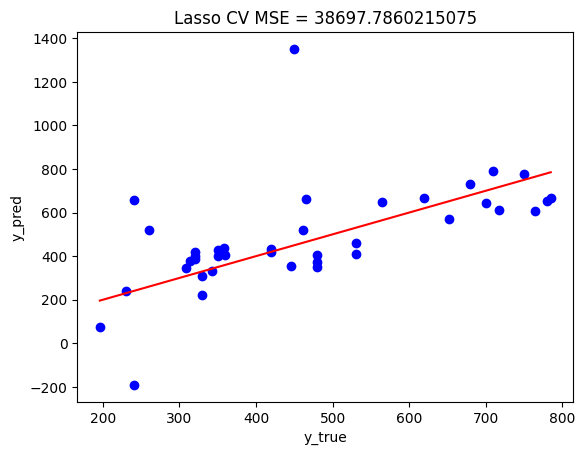

In [8]:
cross_validate_and_plot(best_lasso, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [12]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 12 candidates, totalling 468 fits
[CV 1/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-17128.266 total time=   0.0s
[CV 2/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-367.639 total time=   0.0s
[CV 3/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-1378.266 total time=   0.0s
[CV 4/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-147.147 total time=   0.0s
[CV 5/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-5585.938 total time=   0.0s
[CV 6/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/3

[CV 28/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-156025.000 total time=   0.0s
[CV 29/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 29/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-34855.267 total time=   0.0s
[CV 30/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 30/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-18864.425 total time=   0.0s
[CV 31/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 31/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-2.875 total time=   0.0s
[CV 32/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 32/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-1688.138 total time=   0.0s
[CV 33/39; 2/12] START max_depth=2, min_samples_leaf=2..........................
[CV 33/39; 2/12] END max_depth=2, min_samples_leaf=2;, score=-144917.262 total time=   0.0s
[CV 34/39; 2/12] START max_depth=2, min_samples_leaf

[CV 25/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-1701.562 total time=   0.0s
[CV 26/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 26/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-8235.562 total time=   0.0s
[CV 27/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 27/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-5852.250 total time=   0.0s
[CV 28/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 28/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-156025.000 total time=   0.0s
[CV 29/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 29/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-26278.116 total time=   0.0s
[CV 30/39; 4/12] START max_depth=3, min_samples_leaf=2..........................
[CV 30/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-51680.444 total time=   0.0s
[CV 31/39; 4/12] START max_depth=3, min_samples_lea

[CV 13/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-15101.679 total time=   0.0s
[CV 14/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 14/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-506.250 total time=   0.0s
[CV 15/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 15/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-192721.000 total time=   0.0s
[CV 16/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 16/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-2162.250 total time=   0.0s
[CV 17/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 17/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-812.250 total time=   0.0s
[CV 18/39; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 18/39; 6/12] END max_depth=5, min_samples_leaf=2;, score=-209764.000 total time=   0.0s
[CV 19/39; 6/12] START max_depth=5, min_samples_leaf

[CV 39/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-1156.000 total time=   0.0s
[CV 1/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 1/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-400.000 total time=   0.0s
[CV 2/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 2/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-1.778 total time=   0.0s
[CV 3/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 3/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-400.000 total time=   0.0s
[CV 4/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 4/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-5625.000 total time=   0.0s
[CV 5/39; 8/12] START max_depth=7, min_samples_leaf=2...........................
[CV 5/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-1024.000 total time=   0.0s
[CV 6/39; 8/12] START max_depth=7, min_samples_leaf=2............

[CV 22/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-1600.000 total time=   0.0s
[CV 23/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 23/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-7569.000 total time=   0.0s
[CV 24/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 24/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-100.000 total time=   0.0s
[CV 25/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 25/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-1936.000 total time=   0.0s
[CV 26/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 26/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-23716.000 total time=   0.0s
[CV 27/39; 9/12] START max_depth=9, min_samples_leaf=1..........................
[CV 27/39; 9/12] END max_depth=9, min_samples_leaf=1;, score=-25600.000 total time=   0.0s
[CV 28/39; 9/12] START max_depth=9, min_samples_leaf=1

[CV 6/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-14400.000 total time=   0.0s
[CV 7/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 7/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-2025.000 total time=   0.0s
[CV 8/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 8/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-1296.000 total time=   0.0s
[CV 9/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 9/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-400.000 total time=   0.0s
[CV 10/39; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 10/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-27556.000 total time=   0.0s
[CV 11/39; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 11/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 12/39; 11/12] START max_depth=11, min_samples

[CV 29/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-12844.444 total time=   0.0s
[CV 30/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 30/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-30625.000 total time=   0.0s
[CV 31/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 31/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-10000.000 total time=   0.0s
[CV 32/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 32/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-506.250 total time=   0.0s
[CV 33/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 33/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-32400.000 total time=   0.0s
[CV 34/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 34/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-5625.000 total time=   0.0s
[CV 35/39; 12/12] START max_depth=11, mi

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000026476C3A490>,
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [13]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [ ]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1)

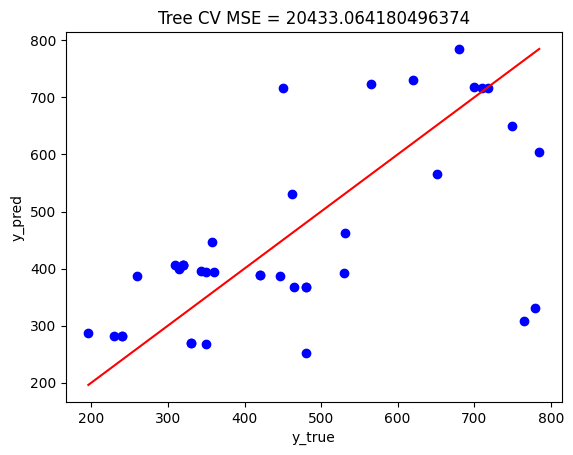

In [14]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

# SVM

## rbf kernel

In [20]:
steps = [('scaler', StandardScaler()), ('svm', SVR(kernel='poly'))]
pipeline = Pipeline(steps)

params = {
    'svm__C':np.linspace(1e-8, 1e-4, 10)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 10 candidates, totalling 390 fits
[CV 1/39; 1/10] START svm__C=1e-08..............................................
[CV 1/39; 1/10] END ..........svm__C=1e-08;, score=-47524.000 total time=   0.0s
[CV 2/39; 1/10] START svm__C=1e-08..............................................
[CV 2/39; 1/10] END ..........svm__C=1e-08;, score=-13924.000 total time=   0.0s
[CV 3/39; 1/10] START svm__C=1e-08..............................................
[CV 3/39; 1/10] END ..........svm__C=1e-08;, score=-16384.000 total time=   0.0s
[CV 4/39; 1/10] START svm__C=1e-08..............................................
[CV 4/39; 1/10] END ...........svm__C=1e-08;, score=-7744.000 total time=   0.0s
[CV 5/39; 1/10] START svm__C=1e-08..............................................
[CV 5/39; 1/10] END ............svm__C=1e-08;, score=-784.000 total time=   0.0s
[CV 6/39; 1/10] START svm__C=1e-08..............................................
[CV 6/39; 1/10] END ...........svm__C=1e-08;, 

[CV 35/39; 3/10] END svm__C=2.2230000000000002e-05;, score=-121.004 total time=   0.0s
[CV 36/39; 3/10] START svm__C=2.2230000000000002e-05............................
[CV 36/39; 3/10] END svm__C=2.2230000000000002e-05;, score=-71288.949 total time=   0.0s
[CV 37/39; 3/10] START svm__C=2.2230000000000002e-05............................
[CV 37/39; 3/10] END svm__C=2.2230000000000002e-05;, score=-100488.914 total time=   0.0s
[CV 38/39; 3/10] START svm__C=2.2230000000000002e-05............................
[CV 38/39; 3/10] END svm__C=2.2230000000000002e-05;, score=-47960.886 total time=   0.0s
[CV 39/39; 3/10] START svm__C=2.2230000000000002e-05............................
[CV 39/39; 3/10] END svm__C=2.2230000000000002e-05;, score=-11024.978 total time=   0.0s
[CV 1/39; 4/10] START svm__C=3.334e-05..........................................
[CV 1/39; 4/10] END ......svm__C=3.334e-05;, score=-47523.784 total time=   0.0s
[CV 2/39; 4/10] START svm__C=3.334e-05................................

[CV 35/39; 6/10] END .......svm__C=5.556e-05;, score=-121.011 total time=   0.0s
[CV 36/39; 6/10] START svm__C=5.556e-05.........................................
[CV 36/39; 6/10] END .....svm__C=5.556e-05;, score=-71288.872 total time=   0.0s
[CV 37/39; 6/10] START svm__C=5.556e-05.........................................
[CV 37/39; 6/10] END ....svm__C=5.556e-05;, score=-100488.785 total time=   0.0s
[CV 38/39; 6/10] START svm__C=5.556e-05.........................................
[CV 38/39; 6/10] END .....svm__C=5.556e-05;, score=-47960.715 total time=   0.0s
[CV 39/39; 6/10] START svm__C=5.556e-05.........................................
[CV 39/39; 6/10] END .....svm__C=5.556e-05;, score=-11024.945 total time=   0.0s
[CV 1/39; 7/10] START svm__C=6.667e-05..........................................
[CV 1/39; 7/10] END ......svm__C=6.667e-05;, score=-47523.568 total time=   0.0s
[CV 2/39; 7/10] START svm__C=6.667e-05..........................................
[CV 2/39; 7/10] END ......sv

[CV 24/39; 9/10] END .....svm__C=8.889e-05;, score=-43262.239 total time=   0.0s
[CV 25/39; 9/10] START svm__C=8.889e-05.........................................
[CV 25/39; 9/10] END .....svm__C=8.889e-05;, score=-43261.925 total time=   0.0s
[CV 26/39; 9/10] START svm__C=8.889e-05.........................................
[CV 26/39; 9/10] END .....svm__C=8.889e-05;, score=-63503.677 total time=   0.0s
[CV 27/39; 9/10] START svm__C=8.889e-05.........................................
[CV 27/39; 9/10] END .....svm__C=8.889e-05;, score=-16383.890 total time=   0.0s
[CV 28/39; 9/10] START svm__C=8.889e-05.........................................
[CV 28/39; 9/10] END .....svm__C=8.889e-05;, score=-35343.842 total time=   0.0s
[CV 29/39; 9/10] START svm__C=8.889e-05.........................................
[CV 29/39; 9/10] END ......svm__C=8.889e-05;, score=-9409.001 total time=   0.0s
[CV 30/39; 9/10] START svm__C=8.889e-05.........................................
[CV 30/39; 9/10] END ......s

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000026476C3B140>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVR(kernel='poly'))]),
             param_grid={'svm__C': array([1.000e-08, 1.112e-05, 2.223e-05, 3.334e-05, 4.445e-05, 5.556e-05,
       6.667e-05, 7.778e-05, 8.889e-05, 1.000e-04])},
             scoring='neg_mean_squared_error', verbose=10)

In [21]:
grid.best_params_

{'svm__C': 2.2230000000000002e-05}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('svm', SVR(kernel='poly', C=2.223e-05))]
#svm = Pipeline(steps)

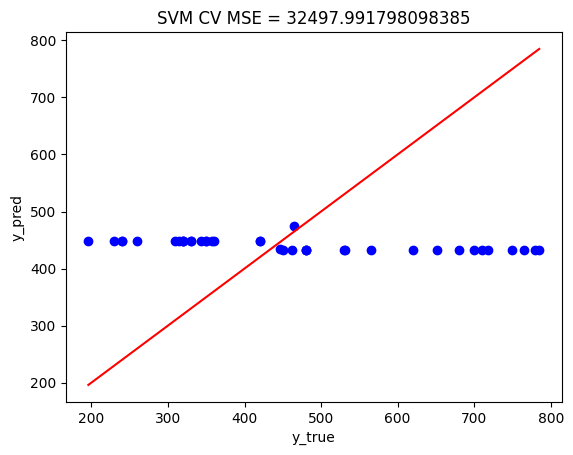

In [22]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='SVM')

# RandomForest

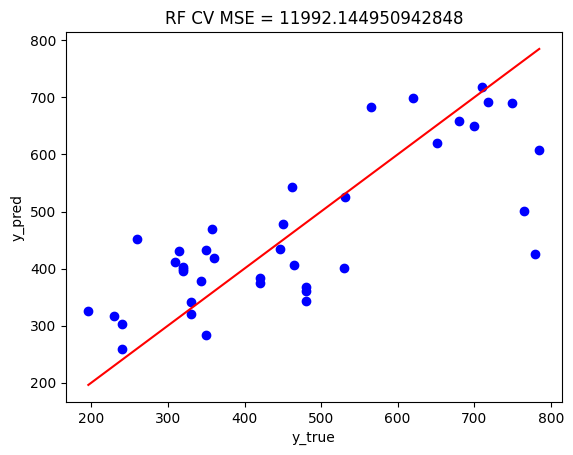

In [24]:
rf = RandomForestRegressor()
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

# Gradient Boosting

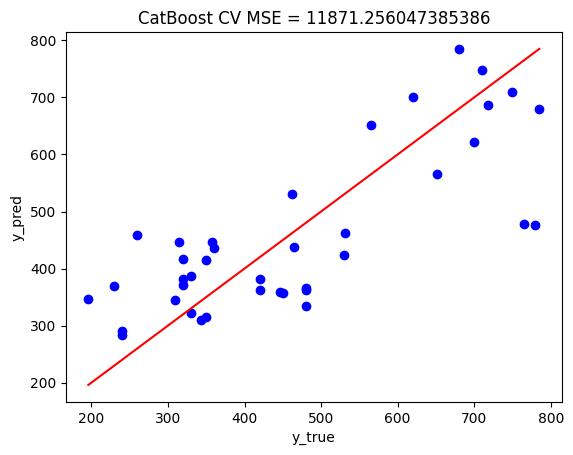

In [25]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')